In [2]:
import os
from nibabel.testing import data_path
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2

/anaconda/envs/py35/lib/python3.5/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)
/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [20]:
#"liverseg-2017-nipsws/LiTS_database/liver_seg/"
RESULTS_PATH = "liverseg-2017-nipsws/results/seg_liver" # seg_liver_ck

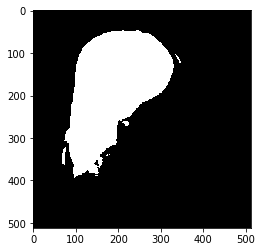

In [5]:
for folder_no in os.listdir(RESULTS_PATH):
    path = os.path.join(RESULTS_PATH,folder_no)
    
    for img in os.listdir(path):
        img = np.load(os.path.join(path,img)).astype('int32')
        plt.imshow(img,cmap='gray')
        #plt.show()
        #print(img)    

In [21]:
for folder_no in os.listdir(RESULTS_PATH):
    path = os.path.join(RESULTS_PATH,folder_no)
    
    max_channel = max([int(idx[:-4]) for idx in os.listdir(path)])
    img_volume = np.zeros((512,512,max_channel+1))
    
    for img in os.listdir(path):
        idx = int(img[:-4])
        
        img = np.load(os.path.join(path,img))
        img_volume[:,:,idx] = img
        
    np.save("liverseg-2017-nipsws/results/output_volumes/"+folder_no+".npy",img_volume)